In [1]:
# Import libraries
import pandas as pd, os, json, textwrap, math


In [2]:
file_path = 'Shein.csv'
print(os.path.isfile(file_path))


True


In [11]:
# df = pd.read_csv(file_path, nrows=5)
# df.head()

df = pd.read_csv(file_path)
df

,reviewId,content,score,thumbsUpCount,at,replyContent,repliedAt,appName
0,9f73e569-bb36-4c35-a5c2-5412a3e32cc6,I have bought all my clothes from shein for th...,5,323,1723348459000,NaN,NaN,Shein
1,731ca074-021f-40fa-a66e-bf7d55702450,PLEASE STOP IT WITH THE POP-UP OFFERS! You mak...,1,215,1723359459000,Hi! Hope you have a nice shopping experience h...,1.723275e+12,Shein
2,feab6570-16c8-4157-933c-1af2a55193ce,"Great app for shopping, but I love shein it's ...",2,160,1722911026000,Hi! Hope you have a nice shopping experience h...,1.722930e+12,Shein
3,32155d73-a4b5-4038-9ed5-9018c40acfb7,Update: one item out of 5 in order recently re...,3,20,1723168890000,NaN,NaN,Shein
4,25316898-663a-4a52-ba0d-38b32335c499,"Nice app to buy hair accessories, summer dress...",4,7630,1713178192000,NaN,NaN,Shein
...,...,...,...,...,...,...,...,...
40495,557c4be5-aca4-4025-bb54-974efd07944f,Sometimes getting the kids sizes right are a b...,4,0,1651170814000,NaN,NaN,Shein
40496,0436f7f3-9a71-4485-a6e3-39a8cc4c859a,My experience with shein is very good because ...,5,0,1655402534000,NaN,NaN,Shein
40497,c16d2729-5f59-4ad9-8242-86ae2a6e7934,Fairly good experience other than trying to co...,4,0,1651168180000,NaN,NaN,Shein
40498,b159238c-737f-465a-bd63-2c9a30689fdb,"Great shopping website, easy and fun to use. P...",5,1,1643980873000,\nIt is our great honor to receive your praise...,1.644429e+12,Shein


In [4]:
df.columns

Index(['reviewId', 'content', 'score', 'thumbsUpCount', 'at', 'replyContent',
       'repliedAt', 'appName'],
      dtype='object')

In [5]:
df_all = pd.read_csv(file_path)
df_all.shape


(40500, 8)

In [6]:
df_all.tail()


,reviewId,content,score,thumbsUpCount,at,replyContent,repliedAt,appName
40495,557c4be5-aca4-4025-bb54-974efd07944f,Sometimes getting the kids sizes right are a b...,4,0,1651170814000,NaN,NaN,Shein
40496,0436f7f3-9a71-4485-a6e3-39a8cc4c859a,My experience with shein is very good because ...,5,0,1655402534000,NaN,NaN,Shein
40497,c16d2729-5f59-4ad9-8242-86ae2a6e7934,Fairly good experience other than trying to co...,4,0,1651168180000,NaN,NaN,Shein
40498,b159238c-737f-465a-bd63-2c9a30689fdb,"Great shopping website, easy and fun to use. P...",5,1,1643980873000,\nIt is our great honor to receive your praise...,1.644429e+12,Shein
40499,a13e1da6-f1b1-4aa6-aa4b-53e25de65a9c,"The app is great, was able to track my order t...",5,0,1647106996000,Glad you love SHEIN！💕\n,1.646938e+12,Shein


In [15]:
# Filter rows mentioning 'Canada', 'CAD', or Canadian cities
import re

# Define keywords for Canadian locations
canadian_keywords = [
    "Canada", "Ontario", "Quebec", "British Columbia", "Alberta", "Manitoba", "Saskatchewan", 
    "Nova Scotia", "New Brunswick", "Newfoundland and Labrador", "Prince Edward Island", 
    "Northwest Territories", "Yukon", "Nunavut",
    "Toronto", "Vancouver", "Montreal", "Calgary", "Ottawa", "Edmonton", "Winnipeg", "Halifax",
    r"\bON\b", r"\bQC\b", r"\bBC\b", r"\bAB\b", r"\bMB\b", r"\bSK\b", r"\bNS\b", r"\bNB\b", 
    r"\bNL\b", r"\bPE\b", r"\bNT\b", r"\bYT\b", r"\bNU\b", "CAD"
]

# Combine into regex pattern
pattern = "|".join(canadian_keywords)

# Create a mask for rows where any cell matches the pattern
mask = df_all.astype(str).apply(lambda row: row.str.contains(pattern, flags=re.IGNORECASE, regex=True, na=False), axis=1).any(axis=1)

# Filter the DataFrame
df_canada = df_all[mask]

df_canada

,reviewId,content,score,thumbsUpCount,at,replyContent,repliedAt,appName
0,9f73e569-bb36-4c35-a5c2-5412a3e32cc6,I have bought all my clothes from shein for th...,5,323,1723348459000,NaN,NaN,Shein
1,731ca074-021f-40fa-a66e-bf7d55702450,PLEASE STOP IT WITH THE POP-UP OFFERS! You mak...,1,215,1723359459000,Hi! Hope you have a nice shopping experience h...,1.723275e+12,Shein
2,feab6570-16c8-4157-933c-1af2a55193ce,"Great app for shopping, but I love shein it's ...",2,160,1722911026000,Hi! Hope you have a nice shopping experience h...,1.722930e+12,Shein
3,32155d73-a4b5-4038-9ed5-9018c40acfb7,Update: one item out of 5 in order recently re...,3,20,1723168890000,NaN,NaN,Shein
7,ebd8073d-754d-4203-b220-3913c17fe8f5,"Nice and affordable, quality usually matches p...",2,17,1722337794000,NaN,NaN,Shein
...,...,...,...,...,...,...,...,...
40465,d73414f1-df9a-4bab-bfda-6bb8cc1822df,"Everything is Great So Far,Only Thing Is A cou...",5,0,1623353698000,NaN,NaN,Shein
40467,cd42eb23-6f31-4453-8273-fffb00fa7752,This app is worst app.I request not to install...,1,3,1580726565000,"Hi, sincerely sorry for the inconvenience. We ...",1.578484e+12,Shein
40472,1aa86d12-f0f1-4595-b880-a95271afdb79,"Im in South Africa, been my 6th order and im v...",5,0,1661369611000,NaN,NaN,Shein
40483,4d8dabf3-2c75-49e8-8803-ee1ef5e808db,"I love their clothes, the app is easy to navig...",5,2,1689540292000,NaN,NaN,Shein


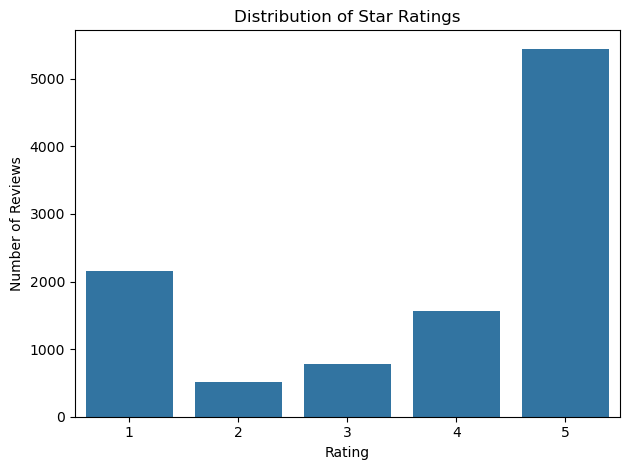

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='score', data=df_canada)
plt.title("Distribution of Star Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

In [19]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (run only once)
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Make sure df_canada is a copy to avoid SettingWithCopyWarning
df_canada = df_canada.copy()

# Add sentiment score
df_canada['sentiment_score'] = df_canada['content'].apply(
    lambda x: sia.polarity_scores(str(x))['compound']
)

# Add sentiment label
df_canada['sentiment_label'] = df_canada['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral'
)
df_canada

[nltk_data] Downloading package vader_lexicon to C:\Users\Gurwinder
[nltk_data]     Ladd\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviewId,content,score,thumbsUpCount,at,replyContent,repliedAt,appName,sentiment_score,sentiment_label
0,9f73e569-bb36-4c35-a5c2-5412a3e32cc6,I have bought all my clothes from shein for th...,5,323,1723348459000,NaN,NaN,Shein,0.9335,positive
1,731ca074-021f-40fa-a66e-bf7d55702450,PLEASE STOP IT WITH THE POP-UP OFFERS! You mak...,1,215,1723359459000,Hi! Hope you have a nice shopping experience h...,1.723275e+12,Shein,0.6892,positive
2,feab6570-16c8-4157-933c-1af2a55193ce,"Great app for shopping, but I love shein it's ...",2,160,1722911026000,Hi! Hope you have a nice shopping experience h...,1.722930e+12,Shein,0.7724,positive
3,32155d73-a4b5-4038-9ed5-9018c40acfb7,Update: one item out of 5 in order recently re...,3,20,1723168890000,NaN,NaN,Shein,-0.3903,negative
7,ebd8073d-754d-4203-b220-3913c17fe8f5,"Nice and affordable, quality usually matches p...",2,17,1722337794000,NaN,NaN,Shein,0.9109,positive
...,...,...,...,...,...,...,...,...,...,...
40465,d73414f1-df9a-4bab-bfda-6bb8cc1822df,"Everything is Great So Far,Only Thing Is A cou...",5,0,1623353698000,NaN,NaN,Shein,0.6894,positive
40467,cd42eb23-6f31-4453-8273-fffb00fa7752,This app is worst app.I request not to install...,1,3,1580726565000,"Hi, sincerely sorry for the inconvenience. We ...",1.578484e+12,Shein,-0.6808,negative
40472,1aa86d12-f0f1-4595-b880-a95271afdb79,"Im in South Africa, been my 6th order and im v...",5,0,1661369611000,NaN,NaN,Shein,0.8858,positive
40483,4d8dabf3-2c75-49e8-8803-ee1ef5e808db,"I love their clothes, the app is easy to navig...",5,2,1689540292000,NaN,NaN,Shein,0.7964,positive


In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [22]:
from wordcloud import WordCloud

positive_text = " ".join(df_canada[df_canada['sentiment_label'] == 'positive']['content'])
negative_text = " ".join(df_canada[df_canada['sentiment_label'] == 'negative']['content'])

WordCloud(background_color='white').generate(positive_text).to_image().show()
WordCloud(background_color='black').generate(negative_text).to_image().show()